#Házi feladat
https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/spam.csv

Készítsen a spam.csv segítségével spam detektort! A modell NaiveBayes alapú legyen, CountVectorizer segítségével alakítsa át szöveget. Pipeline és Gridsearch segítségével végezzen hiperparaméter hangolást! Hiper paraméterek:
CountVectorizer esetén: ngram_range, analyzer, MultinomialNB esetén: alpha, fit_prior! A modellt classification_report segítségével értékelje!
Készítsen hozzá zavartsági (confusion) mátrixot is!
Beküldési határidő: 2024.05.30!

1. rész

In [23]:
!pip install pandas

In [40]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/spam.csv', header=0, encoding="ISO-8859-1")

df = df.drop("Unnamed: 2", axis='columns')
df = df.drop("Unnamed: 3", axis='columns')
df = df.drop("Unnamed: 4", axis='columns')

X = df.v2
y = df.v1

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = le.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='char', ngram_range=(1,5)) # analyzer='char', ngram_range=(1,5) próbáljuk ki a karakterszintű tokenizálással is

x_train = vec.fit_transform(X_train)
x_test = vec.transform(X_test)

In [43]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(fit_prior=True) # Az osztály előzetes valószínűségeinek megtanulása, ha hamis akkor egyenletes előfeltevést használunk.
clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

In [44]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred) # macro avg az osztályok értékeinek átlaga, a súlyozott figyelembe veszi az osztályba tartozó elemszámot is
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1453
           1       0.98      0.94      0.96       219

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



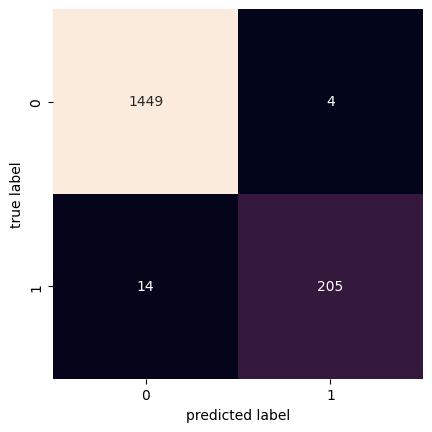

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = clf.classes_   #list(set(y_test_pred))
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels = labels)
plt.ylabel('true label')
plt.xlabel('predicted label');

2. rész

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline(steps=[
    ('CountVectorizer', CountVectorizer()),
    ('MultinomialNB', MultinomialNB())]
)

In [47]:
param_grid = {
    'CountVectorizer__ngram_range': [(1,1), (1,2), (1,3)],
    'MultinomialNB__alpha': [0.1, 1],
    'MultinomialNB__fit_prior': [True, False], #Az osztály előzetes valószínűségeinek megtanulása vagy sem. Ha hamis, akkor egyenletes előfeltevést használunk.
}

In [48]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(pipe, param_grid, scoring='precision_macro', n_jobs=-1)
search.fit(X_train, y_train) # nagy X az eredeti szöveges adatokat jelenti
print(search.best_params_)

{'CountVectorizer__ngram_range': (1, 3), 'MultinomialNB__alpha': 1, 'MultinomialNB__fit_prior': True}


In [49]:
y_test_pred = search.predict(X_test) # a legjobb modellt használjuk

In [50]:
report = classification_report(y_test, y_test_pred) # macro avg az osztályok értékeinek átlaga, a súlyozott figyelembe veszi az osztályba tartozó elemszámot is
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.99      0.87      0.92       219

    accuracy                           0.98      1672
   macro avg       0.98      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



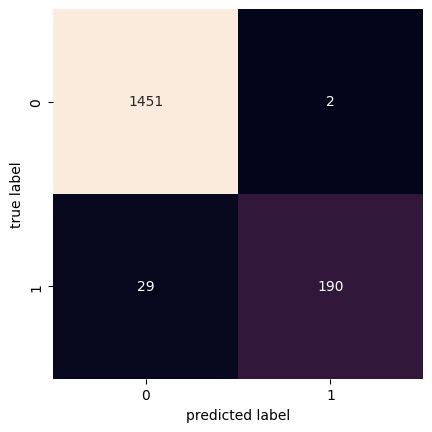

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = clf.classes_   #list(set(y_test_pred))
mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels = labels)
plt.ylabel('true label')
plt.xlabel('predicted label');